In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
f1 = pd.read_json('archive/interconnect_json/file_99.json')

In [3]:
f1.head()

,BONDS,BOND_COUNT,FILE_ID,START_DATE_TIME,STATION_ID,UUT_SERIAL_NUMBER
0,"{'BOND_ID': 1, 'PROCESS_PROGRAM': 'Z06_TS_FP_K...",888,1,2016-01-06 14:04:36,M364110709,97192
1,"{'BOND_ID': 9, 'PROCESS_PROGRAM': 'Z06_TS_FP_K...",888,1,2016-01-06 14:04:36,M364110709,97192
2,"{'BOND_ID': 17, 'PROCESS_PROGRAM': 'Z06_TS_FP_...",888,1,2016-01-06 14:04:36,M364110709,97192
3,"{'BOND_ID': 25, 'PROCESS_PROGRAM': 'Z06_TS_FP_...",888,1,2016-01-06 14:04:36,M364110709,97192
4,"{'BOND_ID': 33, 'PROCESS_PROGRAM': 'Z06_TS_FP_...",888,1,2016-01-06 14:04:36,M364110709,97192


In [52]:
n_len = len(f1.BONDS[0]['TRACE_SAMPLES'])
    

In [69]:
# f1.BONDS[880]['PULL_TEST_STATUS']
f1.shape

(888, 6)

In [77]:
# freq = [sam['VOLT'] for sam in f1.BONDS[880]['TRACE_SAMPLES']]
n_bond, n_fail = 0, 0
for i in range(100):
    try:
        f1 = pd.read_json('archive/interconnect_json/file_%d.json' %(i+1))
        status = [0 if b['PULL_TEST_STATUS']=='Pass' else 1 for b in f1.BONDS]
        n_bond += len(status)
        n_fail += sum(status)
    except:
        print('failure loading file #%d' %(i+1))

print('total bonds: %d, failure: %d' %(n_bond, n_fail))
# fig, ax = plt.subplots()
# ax.plot(status)
# plt.show()

failure loading file #58
total bonds: 87931, failure: 18


In [78]:
18.0/87931

0.00020470596262978926

In [9]:
bond_len = []
for i in range(100):
    if i == 57: continue
    f = pd.read_json('archive/interconnect_json/file_%d.json' %(i+1))
    bond_len += [len(b['TRACE_SAMPLES']) for b in f.BONDS]

In [13]:
print('process length of all bonds: %s' %np.unique(bond_len))

process length of all bonds: [ 95 105 150 183 189 208 350]


In [41]:
bl=pd.Series(bond_len)
bl.value_counts()

105    28704
150    19859
350    19232
189    10368
95      4884
183     2442
208     2442
dtype: int64

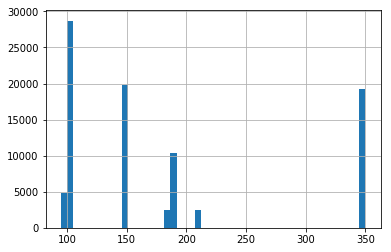

In [54]:
bl.hist(bins=50)

In [3]:
def plot_bond(bond):
    '''
    chart 6 parameters of a bond
    '''
    print('Pull test status: %s' %bond['PULL_TEST_STATUS'])
    params = ['DFRM','DRIV','FREQ','PHAS','US','VOLT']
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,10))
    ind = [s['SAMPLE'] for s in bond['TRACE_SAMPLES']]    
    for ax,param in zip(axes.flatten(), params):
        ax.plot(ind, [s[param] for s in bond['TRACE_SAMPLES']], '.')
        ax.set_title(param)
    fig.tight_layout()    
    plt.show()
    
def plot_bonds(bonds):
    '''
    overlay 6 parameters of a group of bonds
    '''
    print('Pull test status: %s' %np.unique([b['PULL_TEST_STATUS'] for b in bonds]))
    params = ['DFRM','DRIV','FREQ','PHAS','US','VOLT']
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,10))
    for ax,param in zip(axes.flatten(), params):
        ax.set_title(param)
        for b in bonds:
            ax.plot([s[param] for s in b['TRACE_SAMPLES']], '.')
    fig.tight_layout()
    plt.show()

Pull test status: Fail


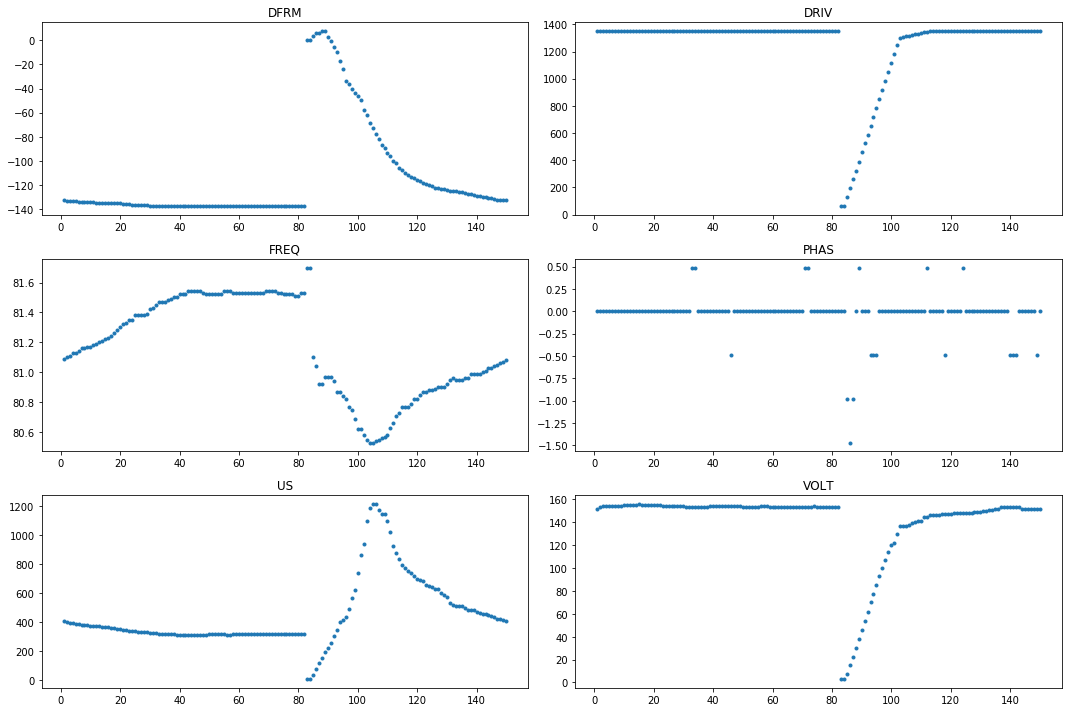

In [88]:
plot_bond(failed_bond[15])

Pull test status: ['Fail']


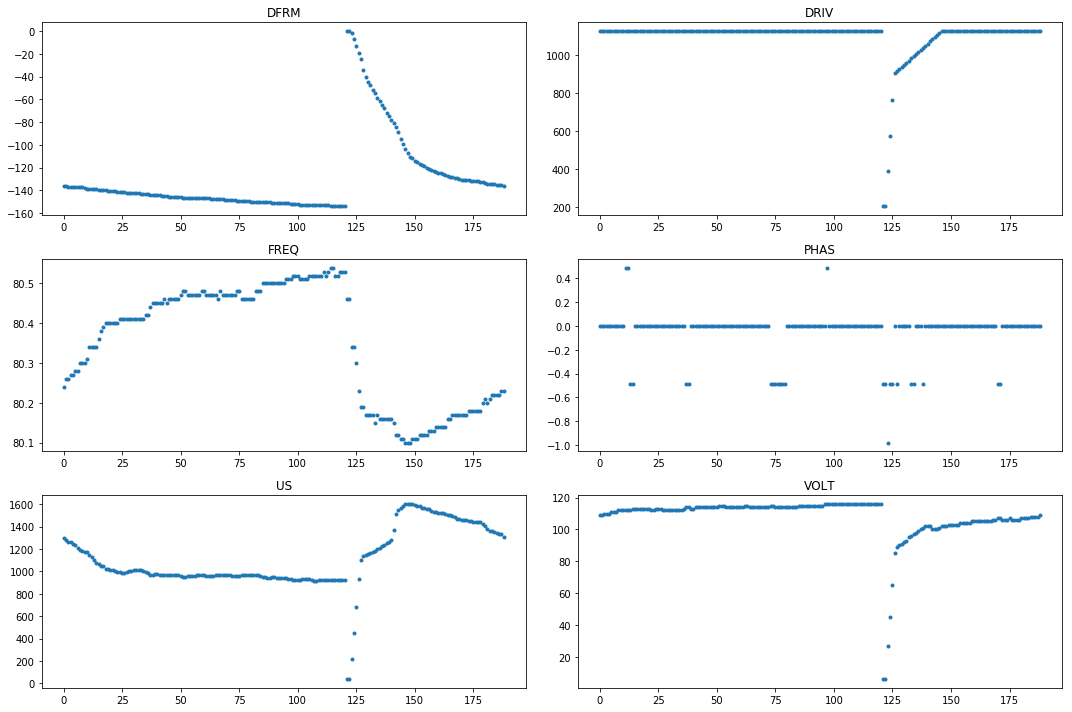

In [102]:
plot_bonds([b for b in failed_bond if len(b['TRACE_SAMPLES'])==189 and b['PULL_TEST_STATUS']=='Fail'])

Pull test status: ['Fail']


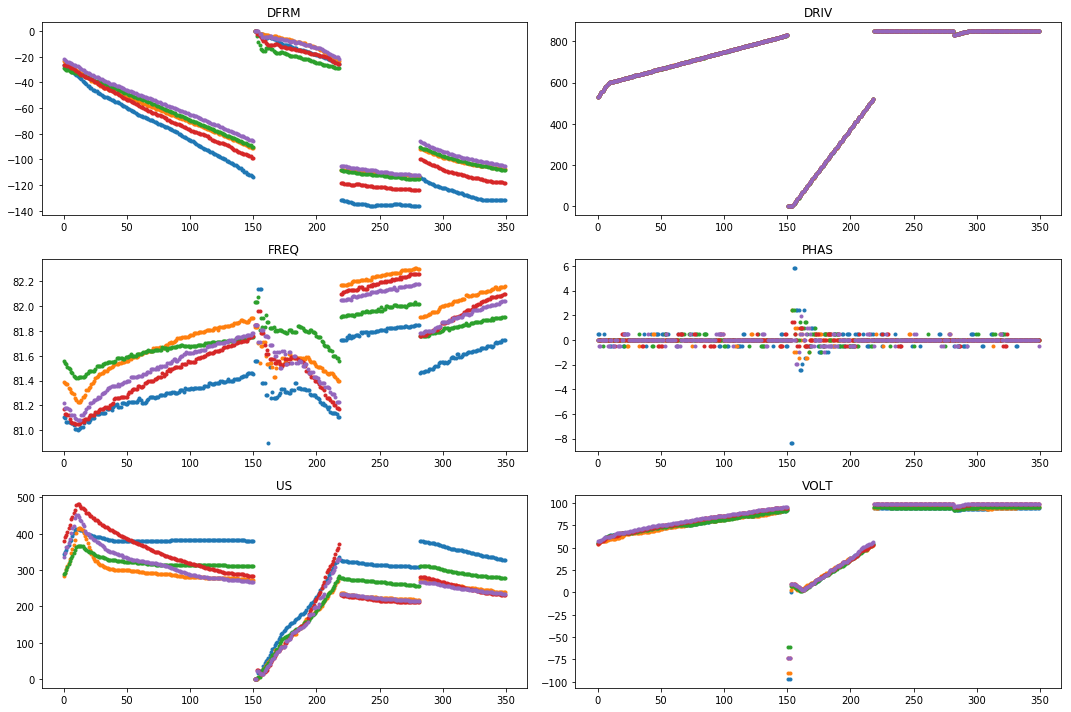

In [106]:
plot_bonds([b for b in failed_bond if len(b['TRACE_SAMPLES'])==350 and b['PULL_TEST_STATUS']=='Fail'])

Pull test status: ['Fail']


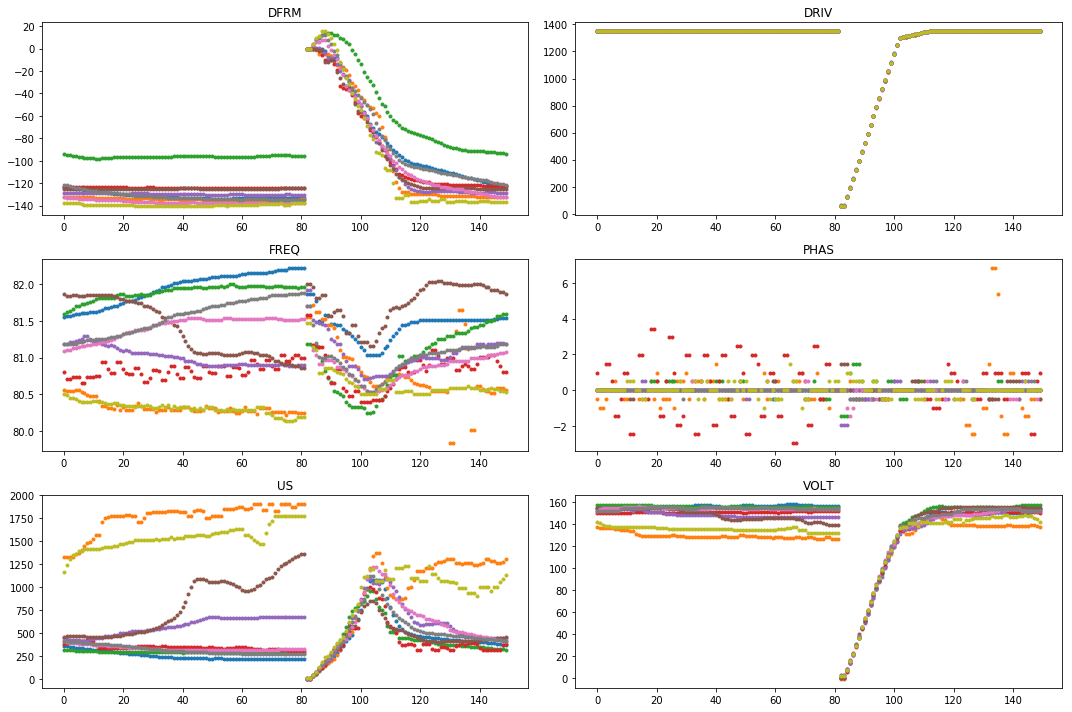

In [115]:
plot_bonds([b for b in failed_bond if len(b['TRACE_SAMPLES'])==150 and b['PULL_TEST_STATUS']=='Fail'])

In [112]:
np.unique([b['PULL_TEST_STATUS'] for b in f1.BONDS])

bl = pd.Series([len(b['TRACE_SAMPLES']) for b in f1.BONDS])

In [114]:
bl.value_counts()

350    233
105    228
189    216
150    211
dtype: int64

Pull test status: ['Pass']


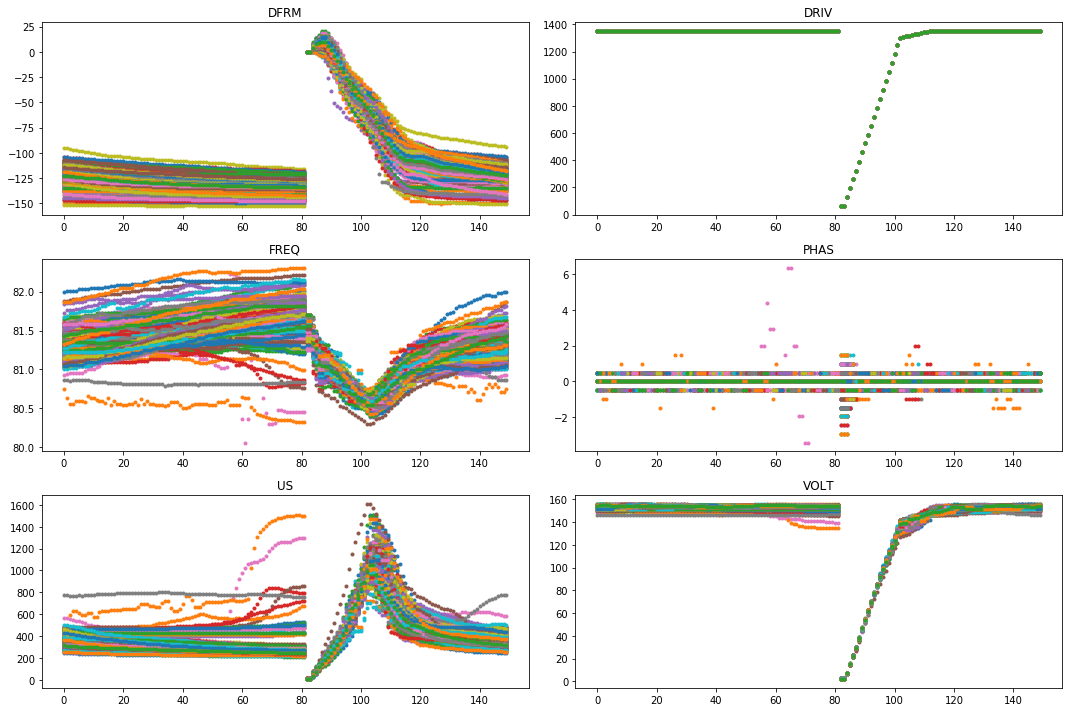

In [12]:
plot_bonds([b for b in f1.BONDS if len(b['TRACE_SAMPLES'])==150 and b['PULL_TEST_STATUS']=='Pass'])

In [17]:
# plot_bonds([b for b in f1.BONDS if len(b['TRACE_SAMPLES'])>178 and len(b['TRACE_SAMPLES'])<=185][:100])
pd.Series([len(b['TRACE_SAMPLES']) for b in f1.BONDS]).value_counts()

105    444
150    246
350    201
dtype: int64

Pull test status: ['Pass']


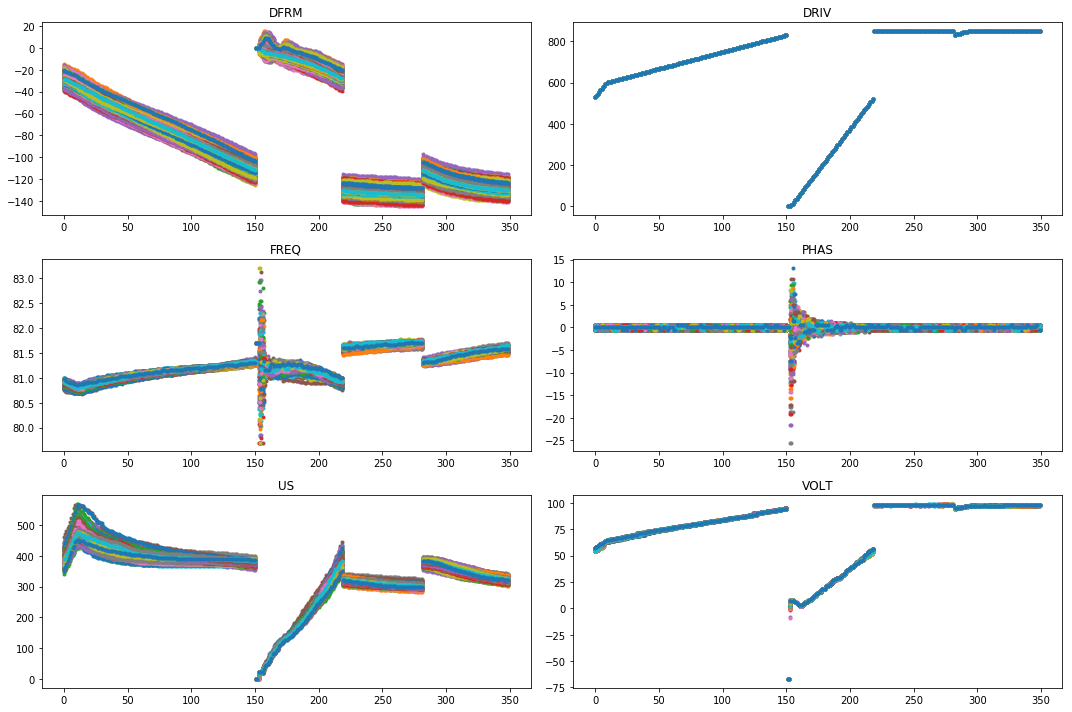

In [13]:
plot_bonds([b for b in f1.BONDS if len(b['TRACE_SAMPLES'])==350])

### get failed bonds

In [18]:
failed_bond = []
for i in range(100):
    if i==57: continue
    f = pd.read_json('archive/interconnect_json/file_%d.json' %(i+1))
    for b in f.BONDS: 
        if b['PULL_TEST_STATUS'] != 'Pass':
            failed_bond.append(b)

In [29]:
print('failed bond processing length: %s' %np.sort([len(b['TRACE_SAMPLES']) for b in failed_bond if b['PULL_TEST_STATUS']=='Fail']))

failed bond processing length: [150 150 150 150 150 150 150 150 150 189 350 350 350 350 350]


In [37]:
[fb['CELL_POLARITY'] for fb in failed_bond if fb['PULL_TEST_STATUS']=='Fail']
# failed_bond[2]['CELL_POLARITY']

KeyError: 'CELL_POLARITY'

### charting

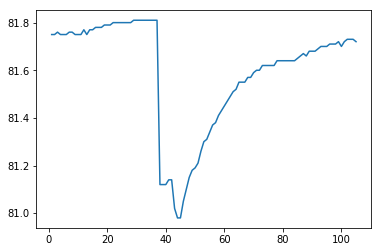

In [127]:
i=95
freq = [sam['FREQ'] for sam in f1.BONDS[i]['TRACE_SAMPLES']]
index = [sam['SAMPLE'] for sam in f1.BONDS[i]['TRACE_SAMPLES']]
fig, ax = plt.subplots()
ax.plot(index, freq)
plt.show()

In [7]:
pt = [len(b['TRACE_SAMPLES']) for b in f1.BONDS]

In [8]:
np.unique(pt)

array([105, 150, 189, 350])

# Divider

In [6]:
train = pd.read_json('train.json')

In [16]:
train.iloc[2]['features']

['Laundry In Building',
 'Dishwasher',
 'Hardwood Floors',
 'Pets Allowed Case by Case']

In [20]:
test = pd.read_json('test.json')

In [27]:
train.interest_level.value_counts()

low       34284
medium    11229
high       3839
Name: interest_level, dtype: int64

In [47]:
train.iloc[456]

bathrooms                                                          1
bedrooms                                                           0
building_id                                                        0
created                                          2016-04-30 01:28:49
description        Full time doorman building. Gas and electric i...
display_address                                   Christopher Street
features           [Doorman, Pre-War, No Fee, Dogs Allowed, Cats ...
interest_level                                                   low
latitude                                                     40.7334
listing_id                                                   6944605
longitude                                                   -74.0047
manager_id                          6622a56323ab90abcace1f529cd7c95d
photos             [https://photos.renthop.com/2/6944605_a6606d12...
price                                                           3395
street_address                    

In [162]:
a=[b.lower() for a in train.features.values for b in a if len(b)<20]
b=np.unique(a)

In [183]:
train[['bedrooms', 'bathrooms']].values

array([[ 3. ,  1.5],
       [ 2. ,  1. ],
       [ 1. ,  1. ],
       ..., 
       [ 1. ,  1. ],
       [ 0. ,  1. ],
       [ 2. ,  1. ]])

In [99]:
train.head(5)

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address
10,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue
10000,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",low,40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,[https://photos.renthop.com/2/7150865_be3306c5...,5465,808 Columbus Avenue
100004,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",high,40.7388,6887163,-74.0018,d9039c43983f6e564b1482b273bd7b01,[https://photos.renthop.com/2/6887163_de85c427...,2850,241 W 13 Street
100007,1.0,1,28d9ad350afeaab8027513a3e52ac8d5,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,"[Hardwood Floors, No Fee]",low,40.7539,6888711,-73.9677,1067e078446a7897d2da493d2f741316,[https://photos.renthop.com/2/6888711_6e660cee...,3275,333 East 49th Street
100013,1.0,4,0,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,[Pre-War],low,40.8241,6934781,-73.9493,98e13ad4b495b9613cef886d79a6291f,[https://photos.renthop.com/2/6934781_1fa4b41a...,3350,500 West 143rd Street
